## Import Libraries

In [42]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import utils
from tensorflow.keras import preprocessing

## Load Data

In [43]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
submission = pd.read_csv('./data/submission.csv')

## EDA

In [44]:
train

,id,digit,letter,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,1,5,L,1,1,1,4,3,0,0,...,2,1,0,1,2,4,4,4,3,4
1,2,0,B,0,4,0,0,4,1,1,...,0,3,0,1,4,1,4,2,1,2
2,3,4,L,1,1,2,2,1,1,1,...,3,3,3,0,2,0,3,0,2,2
3,4,9,D,1,2,0,2,0,4,0,...,3,3,2,0,1,4,0,0,1,1
4,5,6,A,3,0,2,4,0,3,0,...,4,4,3,2,1,3,4,3,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2043,2044,6,V,2,4,3,4,2,4,4,...,0,2,2,0,0,1,3,1,4,0
2044,2045,1,L,3,2,2,1,1,4,0,...,2,3,4,2,1,2,3,4,1,1
2045,2046,9,A,4,0,4,0,2,4,4,...,2,3,1,1,3,4,2,2,0,0
2046,2047,0,Z,2,3,3,0,3,0,4,...,2,3,1,1,0,4,1,4,3,1


In [45]:
pd.value_counts(train['letter'])

Z    91
K    90
O    90
H    89
L    89
G    87
M    86
Y    86
U    85
Q    82
T    82
R    81
F    80
X    79
N    77
D    76
S    76
C    74
V    73
A    72
B    71
W    69
J    67
P    66
E    66
I    64
Name: letter, dtype: int64

In [46]:
test

,id,letter,0,1,2,3,4,5,6,7,...,774,775,776,777,778,779,780,781,782,783
0,2049,L,0,4,0,2,4,2,3,1,...,2,0,4,2,2,4,3,4,1,4
1,2050,C,4,1,4,0,1,1,0,2,...,0,3,2,4,2,4,2,2,1,2
2,2051,S,0,4,0,1,3,2,3,0,...,1,3,2,0,3,2,3,0,1,4
3,2052,K,2,1,3,3,3,4,3,0,...,3,0,3,2,4,1,0,4,4,4
4,2053,W,1,0,1,1,2,2,1,4,...,4,3,1,4,0,2,1,2,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20475,22524,P,1,2,1,1,0,0,0,2,...,0,1,3,0,3,0,4,3,1,4
20476,22525,S,4,1,1,4,0,0,1,1,...,1,3,1,0,0,1,3,1,2,0
20477,22526,B,4,2,1,3,2,1,3,0,...,3,2,3,4,1,0,3,3,1,1
20478,22527,K,1,1,2,3,4,0,4,3,...,2,0,0,4,3,3,3,4,4,2


In [47]:
X_temp = np.array(train[[str(i) for i in range(784)]][:32])
X_temp = X_temp.reshape(-1,1,28,28)
X_temp.shape

(32, 1, 28, 28)

In [48]:
y_digit = train['digit'].values
y_letter = train['letter'].values

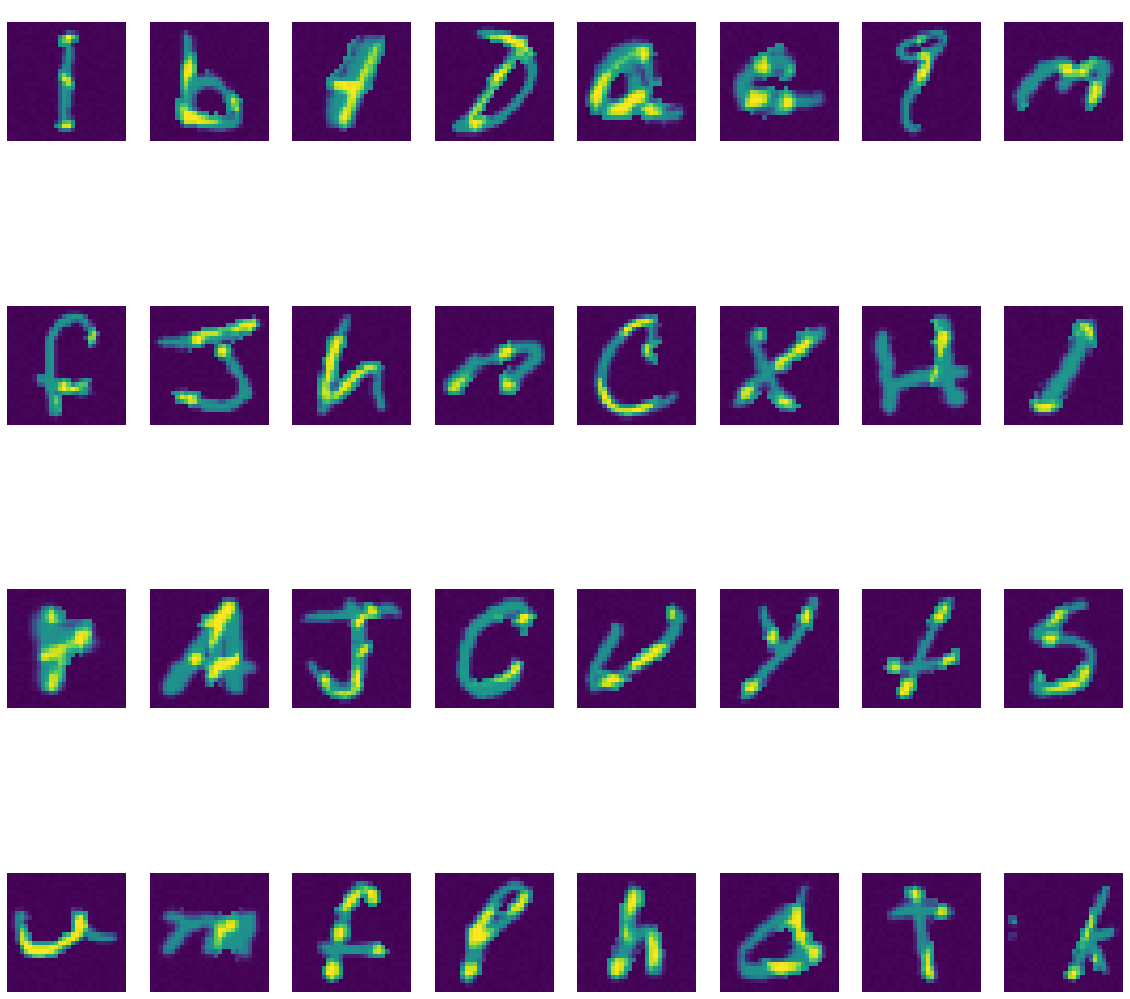

In [49]:
plt.figure(figsize=(20,20))

for idx, (image, digit, letter) in enumerate(zip(X_temp[:32], y_digit[:32] ,y_letter[:32])):
    plt.subplot(4,8,idx+1)
    plt.imshow(image[0])
    title = 'letter : {} / digit : {}'.format(letter, digit)
    plt.title(title, fontdict={'color':'white'})
    plt.axis('off')

## Dataset 

In [50]:
X_train = train.drop(['letter','id','digit'],axis=1)
X_test = test.drop(['letter','id'],axis=1)

In [51]:
X_train /= 255.0
X_test /= 255.0

#### letter one hot

In [52]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


In [53]:
train_letter = train['letter'].values

In [54]:
values = array(train_letter)
print(values)
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
train_letter = onehot_encoder.fit_transform(integer_encoded)
print(train_letter)


['L' 'B' 'L' ... 'A' 'Z' 'Z']
[11  1 11 ...  0 25 25]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [55]:
test_letter = test['letter'].values

In [56]:
values = array(test_letter)
print(values)
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
test_letter = onehot_encoder.fit_transform(integer_encoded)
print(test_letter)

['L' 'C' 'S' ... 'B' 'K' 'S']
[11  2 18 ...  1 10 18]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [57]:
X_train = X_train.values
X_test = X_test.values

In [58]:
X_train.shape

(2048, 784)

In [59]:
X_test.shape

(20480, 784)

In [60]:
train_letter.shape

(2048, 26)

In [61]:
test_letter.shape

(20480, 26)

In [62]:
X_train = np.concatenate((X_train, train_letter), axis=1)

In [63]:
y_train = train['digit']

In [64]:
y_train = utils.to_categorical(y_train, 10)

In [65]:
y_train.shape

(2048, 10)

In [66]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=1)

In [99]:
train_letter = X_train[:,784:]
valid_letter = X_valid[:,784:]
X_train = X_train[:,:784]
X_valid = X_valid[:,:784]

In [100]:
train_letter.shape

(1843, 0, 28, 1)

#### Reshape 28x28

In [114]:
X_train = X_train.reshape(-1,28,28,1)
X_valid = X_valid.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

In [115]:
X_train.shape

(1843, 28, 28, 1)

In [116]:
X_test.shape

(20480, 28, 28, 1)

## Train

In [117]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D, Dropout, Conv2D, MaxPooling2D, Concatenate 
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.losses import sparse_categorical_crossentropy

In [118]:
inputs = Input(shape=(28,28,1))
letter_input = Input(shape=(26))

conv1 = Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1))(inputs)
conv2 = Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu')(conv1)
max1 = MaxPooling2D(pool_size=(2,2))(conv2)
drop1 = Dropout(0.25)(max1)

conv3 = Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu')(drop1)
conv4 = Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu')(conv3)
max2 = MaxPooling2D(pool_size=(2,2), strides=(2,2))(conv4)
drop2 = Dropout(0.25)(max2)

global1 = GlobalAveragePooling2D()(drop2)
dense1 = Dense(256, activation = "relu")(global1)
concat = Concatenate(axis=-1)([dense1, letter_input])
output = Dense(10, activation = "softmax")(concat)

cnn_model = Model(inputs=[inputs,letter_input], outputs=output)

In [119]:
cnn_model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_23 (InputLayer)           [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_64 (Conv2D)              (None, 28, 28, 32)   832         input_23[0][0]                   
__________________________________________________________________________________________________
conv2d_65 (Conv2D)              (None, 28, 28, 32)   25632       conv2d_64[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_32 (MaxPooling2D) (None, 14, 14, 32)   0           conv2d_65[0][0]                  
____________________________________________________________________________________________

In [120]:
cnn_model.compile(loss= 'categorical_crossentropy',optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0),metrics= ['accuracy'])

In [121]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [122]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

In [123]:
epochs = 100
batch_size = 86

In [127]:
history = cnn_model.fit_generator(datagen.flow((X_train,train_letter),y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = ((X_valid,v),y_valid),
                                  verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                            )


Epoch 1/100


ValueError: in user code:

    /home/aiffel0046/anaconda3/envs/aiffel/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:571 train_function  *
        outputs = self.distribute_strategy.run(
    /home/aiffel0046/anaconda3/envs/aiffel/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:951 run  **
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/aiffel0046/anaconda3/envs/aiffel/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2290 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/aiffel0046/anaconda3/envs/aiffel/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2649 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/aiffel0046/anaconda3/envs/aiffel/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:531 train_step  **
        y_pred = self(x, training=True)
    /home/aiffel0046/anaconda3/envs/aiffel/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:927 __call__
        outputs = call_fn(cast_inputs, *args, **kwargs)
    /home/aiffel0046/anaconda3/envs/aiffel/lib/python3.7/site-packages/tensorflow/python/keras/engine/network.py:719 call
        convert_kwargs_to_constants=base_layer_utils.call_context().saving)
    /home/aiffel0046/anaconda3/envs/aiffel/lib/python3.7/site-packages/tensorflow/python/keras/engine/network.py:888 _run_internal_graph
        output_tensors = layer(computed_tensors, **kwargs)
    /home/aiffel0046/anaconda3/envs/aiffel/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:927 __call__
        outputs = call_fn(cast_inputs, *args, **kwargs)
    /home/aiffel0046/anaconda3/envs/aiffel/lib/python3.7/site-packages/tensorflow/python/keras/layers/merge.py:183 call
        return self._merge_function(inputs)
    /home/aiffel0046/anaconda3/envs/aiffel/lib/python3.7/site-packages/tensorflow/python/keras/layers/merge.py:522 _merge_function
        return K.concatenate(inputs, axis=self.axis)
    /home/aiffel0046/anaconda3/envs/aiffel/lib/python3.7/site-packages/tensorflow/python/keras/backend.py:2709 concatenate
        return array_ops.concat([to_dense(x) for x in tensors], axis)
    /home/aiffel0046/anaconda3/envs/aiffel/lib/python3.7/site-packages/tensorflow/python/util/dispatch.py:180 wrapper
        return target(*args, **kwargs)
    /home/aiffel0046/anaconda3/envs/aiffel/lib/python3.7/site-packages/tensorflow/python/ops/array_ops.py:1606 concat
        return gen_array_ops.concat_v2(values=values, axis=axis, name=name)
    /home/aiffel0046/anaconda3/envs/aiffel/lib/python3.7/site-packages/tensorflow/python/ops/gen_array_ops.py:1189 concat_v2
        "ConcatV2", values=values, axis=axis, name=name)
    /home/aiffel0046/anaconda3/envs/aiffel/lib/python3.7/site-packages/tensorflow/python/framework/op_def_library.py:744 _apply_op_helper
        attrs=attr_protos, op_def=op_def)
    /home/aiffel0046/anaconda3/envs/aiffel/lib/python3.7/site-packages/tensorflow/python/framework/func_graph.py:595 _create_op_internal
        compute_device)
    /home/aiffel0046/anaconda3/envs/aiffel/lib/python3.7/site-packages/tensorflow/python/framework/ops.py:3327 _create_op_internal
        op_def=op_def)
    /home/aiffel0046/anaconda3/envs/aiffel/lib/python3.7/site-packages/tensorflow/python/framework/ops.py:1817 __init__
        control_input_ops, op_def)
    /home/aiffel0046/anaconda3/envs/aiffel/lib/python3.7/site-packages/tensorflow/python/framework/ops.py:1657 _create_c_op
        raise ValueError(str(e))

    ValueError: Shape must be rank 2 but is rank 4 for '{{node model_4/concatenate_8/concat}} = ConcatV2[N=2, T=DT_FLOAT, Tidx=DT_INT32](model_4/dense_23/Relu, IteratorGetNext:1, model_4/concatenate_8/concat/axis)' with input shapes: [?,256], [?,?,?,?], [].


## Predict

In [ ]:
result = cnn_model.predict_classes(X_test)

In [112]:
result


NameError: name 'result' is not defined

In [ ]:
submission['digit'] = result

In [ ]:
submission

In [ ]:
submission.to_csv('./submission/submission_concat_letter.csv', index=False)